# Мазур Анастасия Вадимовна, 316 группа ВМК МГУ
## Вариант 10

Пронормировать цены закрытия каждой акции следующим образом

$$ \hat{S}_{t} = \frac{S_{t} - ES_{t}}{\sigma} $$
,где $ES_{t}$- оценка математического ожидания , а $\sigma$ - оценка стандартного отклонения.

- Провести анализ метода главных компонент нормированных цен.
- Построить график важности каждой главной компоненты.
- Получить 3 главных копоненты и три соответствующих вектора факторных нагрузок.
- Создать нейронную сеть автоэнкодера с входом из нормированных акций, 3 нейронами на внутренним слое и с выходом ,как и размерность входа.
- Постройте коды 3 факторов до вращения
- Вычислите соответствующие факторные нагрузки через регрессионную модель
- Поверните факторы так, чтобы они стали некоррелированными и сравните графически повернутые факторы с факторами PCA
- Поверните факторные нагрузки и сравните на графиках с нагрузками PCA.

In [1]:
import pandas as pd

! pip install yfinance # Импорт исторических цен закрытия проводятся из пакета yfinance
import yfinance as yf

import time

import warnings
warnings.filterwarnings("ignore") # Выключаю преждупреждающие сообщения, чтобы не "засорять" вывод

- CZR Caesars Entertainment Consumer Discretionary
- D Dominion Energy Utilities
- DAL Delta Air Lines Industrials
- DD DuPont Materials
- DE Deere & Co. Industrials
- DFS Discover Financial Services Financials
- DG Dollar General Consumer Discretionary
- DGX Quest Diagnostics Health Care
- DHI D. R. Horton Consumer Discretionary
- DHR Danaher Corporation Health Care

In [2]:
start_day = '2021-01-01'
assetList = ['CZR','D','DAL','DD','DE','DFS','DG', 'DGX', 'DHI', 'DHR']

In [3]:
def get_One_Asset(company,start_day):
    df = pd.DataFrame()
    returns = yf.Ticker(company)
    data = returns.history(period="1y",start=start_day)
    df.index=data.index
    df[company]=data.Close
    return df

In [4]:
data = pd.concat([get_One_Asset(company, start_day) for company in assetList], axis=1)
data

,CZR,D,DAL,DD,DE,DFS,DG,DGX,DHI,DHR
Date,,,,,,,,,,
2021-01-04 00:00:00-05:00,71.599998,68.061432,38.730000,67.533279,260.657806,85.832413,205.604111,115.531136,65.808533,221.458603
2021-01-05 00:00:00-05:00,74.769997,67.241638,39.549999,70.856155,267.124573,86.905182,202.682465,116.122520,64.899689,226.954651
2021-01-06 00:00:00-05:00,76.239998,68.678574,40.380001,74.668831,282.785065,91.435783,211.094482,119.909332,64.352417,234.474503
2021-01-07 00:00:00-05:00,78.059998,67.204788,40.230000,77.674789,291.910614,93.437683,213.457260,118.221008,67.127831,237.807846
2021-01-08 00:00:00-05:00,78.800003,67.425850,40.020000,78.548721,286.242401,93.016235,211.584702,117.295776,65.437172,241.557831
...,...,...,...,...,...,...,...,...,...,...
2023-04-10 00:00:00-04:00,45.470001,57.959999,33.970001,69.809998,377.329987,98.169998,216.759995,143.380005,96.220001,249.539993
2023-04-11 00:00:00-04:00,45.919998,58.080002,34.580002,70.680000,380.829987,100.400002,218.619995,143.880005,99.769997,249.880005
2023-04-12 00:00:00-04:00,44.119999,57.889999,33.740002,70.830002,384.390015,99.150002,216.240005,142.470001,98.860001,249.970001


In [5]:
from sklearn.preprocessing import StandardScaler
rates = pd.DataFrame(StandardScaler().fit_transform(data), index=data.index, columns=data.columns)
rates

,CZR,D,DAL,DD,DE,DFS,DG,DGX,DHI,DHR
Date,,,,,,,,,,
2021-01-04 00:00:00-05:00,-0.041449,-0.328179,-0.020622,-0.285633,-2.755776,-1.941256,-0.879329,-1.781363,-1.738452,-1.708732
2021-01-05 00:00:00-05:00,0.086695,-0.437217,0.135857,0.141180,-2.582260,-1.841856,-1.036974,-1.728415,-1.823431,-1.511820
2021-01-06 00:00:00-05:00,0.146119,-0.246096,0.294245,0.630906,-2.162057,-1.422063,-0.583083,-1.389369,-1.874603,-1.242399
2021-01-07 00:00:00-05:00,0.219691,-0.442118,0.265621,1.017011,-1.917201,-1.236573,-0.455594,-1.540530,-1.615093,-1.122972
2021-01-08 00:00:00-05:00,0.249605,-0.412716,0.225547,1.129265,-2.069290,-1.275623,-0.556632,-1.623369,-1.773175,-0.988618
...,...,...,...,...,...,...,...,...,...,...
2023-04-10 00:00:00-04:00,-1.097730,-1.671731,-0.928967,0.006804,0.374772,-0.798089,-0.277387,0.712037,1.105114,-0.702633
2023-04-11 00:00:00-04:00,-1.079539,-1.655770,-0.812561,0.118553,0.468684,-0.591464,-0.177026,0.756803,1.437050,-0.690451
2023-04-12 00:00:00-04:00,-1.152302,-1.681041,-0.972857,0.137820,0.564207,-0.707285,-0.305444,0.630561,1.351962,-0.687227


In [6]:
from sklearn.decomposition import PCA
from sklearn import linear_model

pca = PCA(svd_solver='full')
pca.fit(rates)
print('Explained variance by factors:\n', pca.explained_variance_.round(1))

Explained variance by factors:
 [3.6 2.8 1.8 0.7 0.3 0.2 0.2 0.2 0.1 0.1]


In [7]:
pca_factors = pd.DataFrame(pca.transform(rates), 
                           columns=['pca.f{}'.format(i+1) for i in range(pca.n_components_)], 
                           index=rates.index)
pca_factors.head()

,pca.f1,pca.f2,pca.f3,pca.f4,pca.f5,pca.f6,pca.f7,pca.f8,pca.f9,pca.f10
Date,,,,,,,,,,
2021-01-04 00:00:00-05:00,1.832133,3.874033,-0.257382,-1.475385,0.064773,-0.433313,0.593128,0.506270,-0.186300,0.006015
2021-01-05 00:00:00-05:00,1.417661,3.845008,-0.157734,-1.363864,0.042505,-0.317161,0.650950,0.754194,-0.425267,-0.127054
2021-01-06 00:00:00-05:00,1.008520,3.209184,-0.277984,-0.849900,-0.019516,-0.512263,0.909834,0.977103,-0.628483,-0.188207
2021-01-07 00:00:00-05:00,0.669502,3.002488,-0.029126,-0.742797,0.041782,-0.504768,1.073093,0.785824,-0.961080,-0.196818
2021-01-08 00:00:00-05:00,0.653003,3.133623,-0.176089,-0.842772,0.017431,-0.412358,1.131431,0.886537,-1.110619,-0.278253


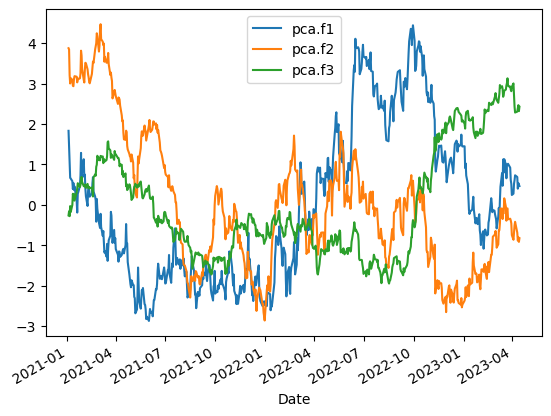

In [8]:
pca_factors[['pca.f1', 'pca.f2','pca.f3']].plot();

In [9]:
maturities = pd.DataFrame({'maturities':[1/12,2/12,1/4,1/2,1,2,3,5,7,10,20,30]})
pca_loadings = pd.DataFrame(pca.components_)
pca_loadings = pca_loadings.transpose()
pca_loadings.columns = ['pca.l{}'.format(i+1) for i in range(pca.n_components_)]
pca_loadings = maturities.join(pca_loadings)
pca_loadings

,maturities,pca.l1,pca.l2,pca.l3,pca.l4,pca.l5,pca.l6,pca.l7,pca.l8,pca.l9,pca.l10
0,0.083333,-0.462050,0.152681,-0.212421,-0.090363,0.187882,-0.193389,-0.344740,0.154951,-0.277941,0.645836
1,0.166667,0.007069,0.061091,-0.657224,0.394244,-0.579059,0.027728,0.002617,-0.170765,0.169643,0.121743
2,0.250000,-0.404127,0.293764,0.028959,0.322208,0.130620,-0.459356,-0.243735,0.113487,0.283003,-0.515053
3,0.500000,-0.459571,0.054027,0.206670,0.076853,-0.392860,-0.031849,0.572787,0.201335,-0.451921,-0.095129
4,1.000000,-0.017639,-0.338215,0.407212,0.692652,-0.045577,0.254265,-0.359824,0.014787,-0.171155,0.118306
5,2.000000,-0.361363,-0.277723,-0.245734,0.234540,0.550540,0.264839,0.456749,-0.121585,0.274653,0.069440
6,3.000000,0.295085,-0.416120,-0.106822,0.177917,0.143818,-0.737885,0.198743,-0.136891,-0.263572,0.061954
7,5.000000,-0.115078,-0.535959,0.046600,-0.199557,-0.264892,-0.126239,-0.039036,0.583098,0.466424,0.111033
8,7.000000,-0.383542,-0.239535,0.275639,-0.263678,-0.246608,-0.128647,-0.110385,-0.720838,0.191215,0.065532
9,10.000000,-0.183355,-0.417655,-0.404495,-0.225616,0.033930,0.195086,-0.319929,0.007949,-0.425833,-0.504446


PCA loadings: 
     maturities    pca.l1    pca.l2    pca.l3
0     0.083333 -0.462050  0.152681 -0.212421
1     0.166667  0.007069  0.061091 -0.657224
2     0.250000 -0.404127  0.293764  0.028959
3     0.500000 -0.459571  0.054027  0.206670
4     1.000000 -0.017639 -0.338215  0.407212
5     2.000000 -0.361363 -0.277723 -0.245734
6     3.000000  0.295085 -0.416120 -0.106822
7     5.000000 -0.115078 -0.535959  0.046600
8     7.000000 -0.383542 -0.239535  0.275639
9    10.000000 -0.183355 -0.417655 -0.404495
10   20.000000       NaN       NaN       NaN
11   30.000000       NaN       NaN       NaN


<Axes: xlabel='maturities'>

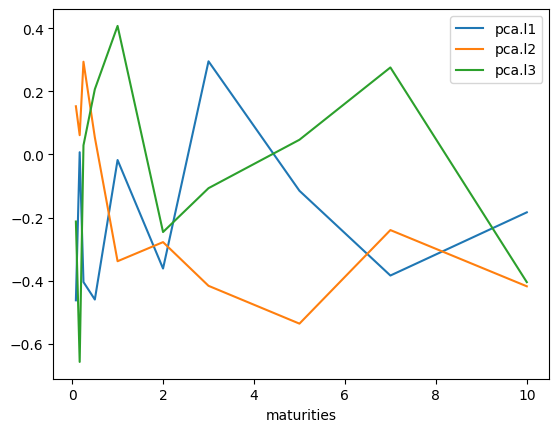

In [10]:
print('PCA loadings: \n',pca_loadings.iloc[:,0:4])
pca_loadings.plot(x='maturities',y=['pca.l1','pca.l2','pca.l3'])

In [2]:
! pip install tensorflow
import tensorflow
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam


[notice] A new release of pip is available: 23.0.1 -> 23.1
[notice] To update, run: pip install --upgrade pip


ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
encoding_dim = 3
# encode:
input_layer = Input(shape=(RatesData.shape[1],))
encoded_layer = Dense(encoding_dim, use_bias=False, activation=None)
encoded = encoded_layer(input_layer)

# decode:
input_encoded = Input((encoding_dim,))
decoded_layer = Dense(RatesData.shape[1], use_bias=False, activation=None)
decoded = decoded_layer(input_encoded)

# models:
encoder = Model(input_layer, encoded, name="encoder")
decoder = Model(input_encoded, decoded, name="decoder")
autoencoder = Model(input_layer, decoder(encoder(input_layer)), name="autoencoder")

lr = 0.0005 # learning rate, defaults to 0.001
autoencoder.compile(optimizer=Adam(lr), loss='mse')  

autoencoder.summary()

In [ ]:
RatesNormalized = (rates - rates.mean() ) / rates.std()
autoencoder.fit(RatesNormalized, RatesNormalized,
                verbose=0,
                epochs=6000,
                batch_size=rates.shape[0])

In [ ]:
encoded_rates = pd.DataFrame(encoder.predict(RatesNormalized), index=RatesData.index, columns=['ae.f1', 'ae.f2','ae.f3'])
print(encoded_rates.head())

In [ ]:
encoded_f1_plot = encoded_rates['pca.f1']
encoded_f2_plot = -encoded_rates['pca.f2']
encoded_f3_plot = -encoded_rates['pca.f3']
encoded_f1_plot.plot()
encoded_f2_plot.plot()
encoded_f3_plot.plot()
plt.show()

In [ ]:
pd.concat([pca_factors, encoded_rates], axis=1).corr().round(2)

NameError: name 'encoded_rates' is not defined